In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx



In [3]:

import pandas as pd

df = pd.read_csv('facebook_wall_posts_datasets.csv', engine='python')
df1=df.head(250)
df2=df1.drop(0)
df2.head()

,%,asym,positive,Unnamed: 3
1,1,1,1,1095135831
2,2,3,1,1097725406
3,4,4,1,1098387569
4,5,5,1,1098425204
5,2,3,1,1098489762


In [5]:
len(df2.columns)-1

3

In [6]:
df3=df2.rename({"%":"node1","asym":"node2","positive":"edges", 'Unnamed: 3' : "time"},axis=1)
df3=df3.astype({'node1': 'int64'})
df3.dtypes
df3

,node1,node2,edges,time
1,1,1,1,1095135831
2,2,3,1,1097725406
3,4,4,1,1098387569
4,5,5,1,1098425204
5,2,3,1,1098489762
6,2,3,1,1098673897
7,6,6,1,1098755376
8,7,8,1,1099526971
9,2,3,1,1099602800
10,9,10,1,1099889279


In [7]:
df31=df3.copy()
df31

,node1,node2,edges,time
1,1,1,1,1095135831
2,2,3,1,1097725406
3,4,4,1,1098387569
4,5,5,1,1098425204
5,2,3,1,1098489762
6,2,3,1,1098673897
7,6,6,1,1098755376
8,7,8,1,1099526971
9,2,3,1,1099602800
10,9,10,1,1099889279


In [8]:
df3['time'].describe()

count    2.490000e+02
mean     1.106493e+09
std      3.995899e+06
min      1.095136e+09
25%      1.103345e+09
50%      1.106934e+09
75%      1.109884e+09
max      1.112753e+09
Name: time, dtype: float64

In [9]:
#lmd=1905075
e=df3['node1'].max()
print(e)
e1=df3['time'].max()
print(e1)

df31['sum']=0
df31=df31.astype({'sum': 'float'})
for i in range(1,e):
    #print('p')
    for index,row in df31.iterrows():
       # print('k')
        if df31.at[index,'node1']==i:
           # print('j')
            if e1-df31.at[index,'time']<=106075:
                df31.at[index,'sum']=1
            elif e1-df31.at[index,'time']>106075 and e1-df31.at[index,'time']<1905075:
                df31.at[index,'sum']= (((e1-df31.at[index,'time'])/1905075)**2)+1
            else:
                df31.at[index,'sum']=0
            
            #df31.at[index,'sum']= (0.5**(((e1)-df31.at[index,'time'])/e1))
            #df31.at[index,'sum']+= 1

#df31.groupby(['node1','time']).sum()
#df31.groupby(['node1'])['sum'].agg('sum')

df31

            
#df31.dtypes

202
1112753451


,node1,node2,edges,time,sum
1,1,1,1,1095135831,0.000000
2,2,3,1,1097725406,0.000000
3,4,4,1,1098387569,0.000000
4,5,5,1,1098425204,0.000000
5,2,3,1,1098489762,0.000000
6,2,3,1,1098673897,0.000000
7,6,6,1,1098755376,0.000000
8,7,8,1,1099526971,0.000000
9,2,3,1,1099602800,0.000000
10,9,10,1,1099889279,0.000000


In [10]:
k=df31.copy()
k=k.drop(["node2","edges","time"],axis=1)
k

aggregation_functions = {'sum': 'max'}
df_new = k.groupby(k['node1']).aggregate(aggregation_functions)
df_new


,sum
node1,
1,0.000000
2,0.000000
4,0.000000
5,1.539111
6,0.000000
7,0.000000
9,0.000000
10,0.000000
11,0.000000


In [11]:
df4=df3.drop(columns="time")

df4.head()


,node1,node2,edges
1,1,1,1
2,2,3,1
3,4,4,1
4,5,5,1
5,2,3,1


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# weighted MultiGraph
#M = nx.MultiGraph()
def from_pandas_dataframe(df, col_from, col_to, col_weight=None, nodes=None):
    """Construct a digraph from dataframe.

    :param df: dataframe contains edge/relation information
    :param col_from: dataframe column name for start of edge
    :param col_to: dataframe column name for end of edge
    :param col_weight: dataframe column name for col_weight, defaults 1 if not provided
    :param nodes: nodes for the graph, default to use nodes from df if not provided
    :return:
    """
    g = nx.MultiDiGraph()

    # add nodes
    if not nodes:
        nodes = set(df[col_from]) | set(df[col_to])
    g.add_nodes_from(nodes)

    # add edges
    for _, row in df.iterrows():
        from_node, to_node = row[col_from], row[col_to]
        if from_node in nodes and to_node in nodes:
            weight = 1 if not col_weight else row[col_weight]
            g.add_edge(from_node, to_node, weight=weight)

    return g

In [13]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

g = from_pandas_dataframe(df4, 'node1', 'node2', col_weight=None, nodes=None)
#adj = nx.adjacency_matrix(g)


In [14]:
 list(g.nodes(data='time', default='Not Available'))

[(1, 'Not Available'),
 (2, 'Not Available'),
 (3, 'Not Available'),
 (4, 'Not Available'),
 (5, 'Not Available'),
 (6, 'Not Available'),
 (7, 'Not Available'),
 (8, 'Not Available'),
 (9, 'Not Available'),
 (10, 'Not Available'),
 (11, 'Not Available'),
 (12, 'Not Available'),
 (13, 'Not Available'),
 (14, 'Not Available'),
 (15, 'Not Available'),
 (16, 'Not Available'),
 (17, 'Not Available'),
 (18, 'Not Available'),
 (19, 'Not Available'),
 (20, 'Not Available'),
 (21, 'Not Available'),
 (22, 'Not Available'),
 (23, 'Not Available'),
 (24, 'Not Available'),
 (25, 'Not Available'),
 (26, 'Not Available'),
 (27, 'Not Available'),
 (28, 'Not Available'),
 (29, 'Not Available'),
 (30, 'Not Available'),
 (31, 'Not Available'),
 (32, 'Not Available'),
 (33, 'Not Available'),
 (34, 'Not Available'),
 (35, 'Not Available'),
 (36, 'Not Available'),
 (37, 'Not Available'),
 (38, 'Not Available'),
 (39, 'Not Available'),
 (40, 'Not Available'),
 (41, 'Not Available'),
 (42, 'Not Available'),
 

C:\Users\mansi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\mansi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


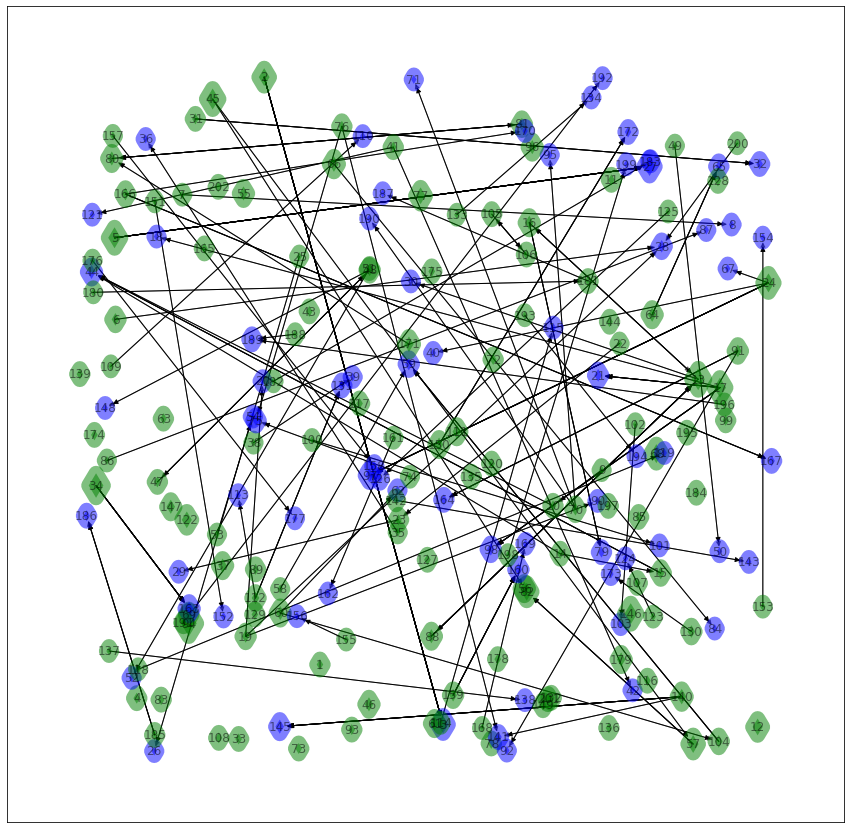

In [15]:

colors = []
pos = nx.random_layout(g)

for node in g:
    if node in df3['node1'].values:
       colors.append('g')
    else: 
       colors.append('b')
d = nx.degree(g)

d = [(d[node]+1) * 20 for node in g.nodes()]
plt.figure(3,figsize=(15,15)) 
nx.draw_networkx(g,pos, node_size=d*100, node_color=colors, node_style='filled',node_shape="d", alpha=0.5, linewidths=15)
nx.draw_networkx_edges(g, pos, width=1,label=True)
plt.show()


In [16]:

dense = nx.adjacency_matrix(g).todense()
adj_df = pd.DataFrame(dense, index=g.nodes(), columns=g.nodes())
adj_df1=adj_df.loc[df4.node1, df4.node2]
#print(adj_df1)
e=adj_df1.columns.duplicated()
r=~e

adj_df1=adj_df1.loc[:,r]


t=adj_df1.index.duplicated()
s=~t
adj_df1=adj_df1.loc[s,:]

#adj_df.sort_values(by='weight',axis=0)
adj_df1

df11 = pd.DataFrame(adj_df1) 
df12=df11.copy()
df11



,1,3,4,5,6,8,10,11,12,13,...,187,189,190,192,194,195,197,199,201,202
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [17]:
nw=df11.sum(axis=0)
nw

1      1
3      7
4      1
5      1
6      1
8      1
10     1
11     1
12     3
13     6
15     1
18     1
20     1
21     3
23     1
24     1
16     1
26     1
27     8
28     3
29     1
30     1
32     2
33     1
34     5
36     1
37     2
39     1
40     1
42     1
      ..
162    1
163    4
164    2
165    1
167    2
169    1
170    1
171    2
172    2
104    1
173    1
174    1
175    1
177    1
178    1
179    2
181    1
183    1
184    1
186    2
187    1
189    2
190    1
192    1
194    1
195    1
197    1
199    1
201    1
202    1
Length: 152, dtype: int64

In [18]:
naw=df11.sum(axis=1)
print(naw)

1      1
2      7
4      1
5      9
6      2
7      1
9      1
11     1
12     3
13     5
14     2
16     3
17     8
19     3
22     1
24     7
25     1
23     1
31     2
33     1
34     9
35     1
37     2
38     1
41     2
43     1
15     2
45     6
46     2
47     1
      ..
153    1
155    1
157    1
159    3
161    1
165    1
166    3
168    1
82     2
171    3
174    1
175    1
176    1
178    1
179    2
180    1
182    1
184    1
185    2
181    1
188    1
191    1
193    1
195    1
196    1
197    1
198    1
200    1
201    1
202    1
Length: 131, dtype: int64


In [19]:
#for i, j in df11.iterrows(): 
    #print(i,j)
    #df11.get_vlaue(i,j)
#smple_rows = df11.index[1:]
###for c in smple_columns:
        #if df11[s][c] > 1:
            #df11[s][c]=1
smple_rows = df12.index[0:]
smple_co = df12.columns[0:]

for i in smple_co:
    for index,row in df12.iterrows():
        if df12.loc[index,i]>1:
            df12.loc[index,i]=1

df12
        
#print(smple_rows )

,1,3,4,5,6,8,10,11,12,13,...,187,189,190,192,194,195,197,199,201,202
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
out_degree=df12.sum(axis=1)
print(out_degree)

1      1
2      1
4      1
5      2
6      2
7      1
9      1
11     1
12     1
13     4
14     2
16     2
17     4
19     3
22     1
24     4
25     1
23     1
31     1
33     1
34     2
35     1
37     1
38     1
41     2
43     1
15     1
45     3
46     1
47     1
      ..
153    1
155    1
157    1
159    1
161    1
165    1
166    2
168    1
82     1
171    2
174    1
175    1
176    1
178    1
179    1
180    1
182    1
184    1
185    1
181    1
188    1
191    1
193    1
195    1
196    1
197    1
198    1
200    1
201    1
202    1
Length: 131, dtype: int64


In [21]:


d={'NAW':naw, 'OUT':out_degree}
r=pd.DataFrame(d)
#r=pd.DataFrame([naw,out_degree], columns = ['NAW','Out_degree']) 
#r["out_degree"]=out_degree
r

,NAW,OUT
1,1,1
2,7,1
4,1,1
5,9,2
6,2,2
7,1,1
9,1,1
11,1,1
12,3,1
13,5,4


In [22]:
#for index,row in r.iterrows():
uac_rank=(0.5*r['NAW'])+(0.5*r['OUT'])
print(uac_rank)

1      1.0
2      4.0
4      1.0
5      5.5
6      2.0
7      1.0
9      1.0
11     1.0
12     2.0
13     4.5
14     2.0
16     2.5
17     6.0
19     3.0
22     1.0
24     5.5
25     1.0
23     1.0
31     1.5
33     1.0
34     5.5
35     1.0
37     1.5
38     1.0
41     2.0
43     1.0
15     1.5
45     4.5
46     1.5
47     1.0
      ... 
153    1.0
155    1.0
157    1.0
159    2.0
161    1.0
165    1.0
166    2.5
168    1.0
82     1.5
171    2.5
174    1.0
175    1.0
176    1.0
178    1.0
179    1.5
180    1.0
182    1.0
184    1.0
185    1.5
181    1.0
188    1.0
191    1.0
193    1.0
195    1.0
196    1.0
197    1.0
198    1.0
200    1.0
201    1.0
202    1.0
Length: 131, dtype: float64


In [23]:
r["uac_rank"]=uac_rank

In [24]:
r

,NAW,OUT,uac_rank
1,1,1,1.0
2,7,1,4.0
4,1,1,1.0
5,9,2,5.5
6,2,2,2.0
7,1,1,1.0
9,1,1,1.0
11,1,1,1.0
12,3,1,2.0
13,5,4,4.5


In [25]:
r=r.sort_values(by=['uac_rank'],ascending=False)
r1=r.copy()
r1
#r.dtypes

,NAW,OUT,uac_rank
17,8,4,6.0
34,9,2,5.5
24,7,4,5.5
5,9,2,5.5
94,8,1,4.5
13,5,4,4.5
45,6,3,4.5
2,7,1,4.0
140,5,2,3.5
146,5,1,3.0


In [107]:
#this one is wrong
#uc rank algo 
#k=len(r1)
k=len(r1[r1['uac_rank']>1])
initial_seed=[]
seed_counter=0
u=0
while seed_counter<k:
   # print("H")
    selected_node=r1.index.values[u]
    #selected_node1=int(selected_node)
    print(selected_node)
    #predecessor =df12.index[df12[selected_node] == 1].tolist() 
    #predecessor=predecessor.astype(int)
    #print(g.predecessors(selected_node))
    predecessor = [pred for pred in g.predecessors(selected_node)]
    #print(predecessor)
    initial_seed.append(selected_node)
    print(initial_seed)
    #initial_seed=initial_seed.astype(int)
    for i in predecessor:
       # print("h")
        if i not in initial_seed:
            r1.at[i,'NAW']=r1.at[i,'NAW']-df11.at[i,selected_node]
            r1.at[i,'OUT']=r1.at[i,'OUT']-1
            #print("l")
        
    r1['uac_rank']=(0.5*r1['NAW'])+(0.5*r1['OUT'])
    seed_counter=seed_counter+1;
    u=u+1
    r1=r1.sort_values(by=['uac_rank'],ascending=False)
#print(initial_seed)
r1.head(len(initial_seed))


            
    
    
    

17
[17]
5
[17, 5]
24
[17, 5, 24]
34
[17, 5, 24, 34]
94
[17, 5, 24, 34, 94]
13
[17, 5, 24, 34, 94, 13]
45
[17, 5, 24, 34, 94, 13, 45]
2
[17, 5, 24, 34, 94, 13, 45, 2]
140
[17, 5, 24, 34, 94, 13, 45, 2, 140]
146
[17, 5, 24, 34, 94, 13, 45, 2, 140, 146]
70
[17, 5, 24, 34, 94, 13, 45, 2, 140, 146, 70]
57
[17, 5, 24, 34, 94, 13, 45, 2, 140, 146, 70, 57]
19
[17, 5, 24, 34, 94, 13, 45, 2, 140, 146, 70, 57, 19]
60
[17, 5, 24, 34, 94, 13, 45, 2, 140, 146, 70, 57, 19, 60]
66
[17, 5, 24, 34, 94, 13, 45, 2, 140, 146, 70, 57, 19, 60, 66]
150
[17, 5, 24, 34, 94, 13, 45, 2, 140, 146, 70, 57, 19, 60, 66, 150]
171
[17, 5, 24, 34, 94, 13, 45, 2, 140, 146, 70, 57, 19, 60, 66, 150, 171]
64
[17, 5, 24, 34, 94, 13, 45, 2, 140, 146, 70, 57, 19, 60, 66, 150, 171, 64]
64
[17, 5, 24, 34, 94, 13, 45, 2, 140, 146, 70, 57, 19, 60, 66, 150, 171, 64, 64]
66
[17, 5, 24, 34, 94, 13, 45, 2, 140, 146, 70, 57, 19, 60, 66, 150, 171, 64, 64, 66]
112
[17, 5, 24, 34, 94, 13, 45, 2, 140, 146, 70, 57, 19, 60, 66, 150, 171, 64,

,NAW,OUT,uac_rank
17,8,4,6.0
5,9,2,5.5
34,9,2,5.5
24,7,4,5.5
94,8,1,4.5
13,5,4,4.5
45,6,3,4.5
2,7,1,4.0
140,5,2,3.5
146,5,1,3.0


In [81]:
#this one is wrong
t1=[]
for i in initial_seed:
    print(i)
    for index,row in df_new.iterrows():
        if index==i:
            print(index)
            t1.append(df_new.at[index,'sum'])
print(t1)    

17
17
34
34
5
5
24
24
94
94
13
13
45
45
2
2
140
140
19
19
70
70
146
146
57
57
60
60
112
112
64
64
150
150
166
166
166
166
112
112
91
91
150
150
159
159
12
12
77
77
6
6
14
14
14
14
12
12
48
48
130
130
77
77
15
15
185
185
55
55
81
81
96
96
37
37
15
15
185
185
185
185
147
147
81
81
82
82
31
31
96
96
61
61
55
55
100
100
[1.762831681557737, 0.0, 1.5391112543238408, 1.0098591402969674, 0.0, 0.0, 0.0, 0.0, 1.0232367320636, 0.0, 1.0977796641949134, 1.0975657438678108, 1.6451443724679853, 0.0, 1.827684239172211, 1.9139041850465104, 0.0, 1.069795866779222, 1.069795866779222, 1.827684239172211, 1.0, 0.0, 0.0, 1.239091905888772, 0.0, 0.0, 0.0, 0.0, 1.239091905888772, 0.0, 0.0, 0.0, 0.0, 1.2011173440501657, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2011173440501657, 1.2011173440501657, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [90]:
#this one is wrong
d1={'node':initial_seed, 'recency_factor':t1}
influencers=pd.DataFrame(d1)
influencers=influencers.sort_values(by=['recency_factor'],ascending=False)
influencers=influencers.drop_duplicates(subset=['node', 'recency_factor'], keep=False)
influencers

,node,recency_factor
15,112,1.913904
0,17,1.762832
12,70,1.645144
2,34,1.539111
33,55,1.201117
10,19,1.097780
11,146,1.097566
8,140,1.023237
3,5,1.009859
20,66,1.000000


In [50]:
r2=r.copy()
r2
#len(r1)

,NAW,OUT,uac_rank
17,8,4,6.0
34,9,2,5.5
24,7,4,5.5
5,9,2,5.5
94,8,1,4.5
13,5,4,4.5
45,6,3,4.5
2,7,1,4.0
140,5,2,3.5
146,5,1,3.0


In [51]:
k1=len(r2[r2['uac_rank']>1])
print(k1)
r2.dtypes
predecessor12 = [pred for pred in g.predecessors(17)]
print(predecessor12)
r3 = pd.DataFrame(columns=r2.columns)
r3['node']=0

49
[17]


In [52]:
#uac rank
initial_seed1=[]
seed_counter1=0
#u=0
while seed_counter1<k1:
   # print("H")
    selected_node1=r2.index.values[0]
    #selected_node1=int(selected_node)
    print(selected_node1)
    #predecessor =df12.index[df12[selected_node] == 1].tolist() 
    #predecessor=predecessor.astype(int)
    #print(g.predecessors(selected_node))
    predecessor1 = [pred for pred in g.predecessors(selected_node1)]
    print(predecessor1)
    initial_seed1.append(selected_node1)
    print(initial_seed1)
    #initial_seed=initial_seed.astype(int)
    for i in predecessor1:
       # print("h")
        if i not in initial_seed1:
            r2.at[i,'NAW']=r2.at[i,'NAW']-df11.at[i,selected_node1]
            r2.at[i,'OUT']=r2.at[i,'OUT']-1
            #print("l")
    r2['uac_rank']=(0.5*r2['NAW'])+(0.5*r2['OUT'])
    #if r2['uac_rank']>1:
    r3=r3.append({'node':selected_node1,'NAW': r2.at[selected_node1,'NAW'],'OUT': r2.at[selected_node1,'OUT'],'uac_rank': r2.at[selected_node1,'uac_rank']},ignore_index=True)
    r2=r2.drop(selected_node1,axis=0)
    seed_counter1=seed_counter1+1;
    #u=u+1
    r2=r2.sort_values(by=['uac_rank'],ascending=False)
#print(initial_seed1)
r3



17
[17]
[17]
34
[34]
[17, 34]
5
[5]
[17, 34, 5]
24
[24]
[17, 34, 5, 24]
13
[13, 16, 88]
[17, 34, 5, 24, 13]
94
[94]
[17, 34, 5, 24, 13, 94]
45
[45]
[17, 34, 5, 24, 13, 94, 45]
2
[]
[17, 34, 5, 24, 13, 94, 45, 2]
140
[]
[17, 34, 5, 24, 13, 94, 45, 2, 140]
70
[]
[17, 34, 5, 24, 13, 94, 45, 2, 140, 70]
19
[]
[17, 34, 5, 24, 13, 94, 45, 2, 140, 70, 19]
146
[146]
[17, 34, 5, 24, 13, 94, 45, 2, 140, 70, 19, 146]
57
[45, 57]
[17, 34, 5, 24, 13, 94, 45, 2, 140, 70, 19, 146, 57]
60
[60]
[17, 34, 5, 24, 13, 94, 45, 2, 140, 70, 19, 146, 57, 60]
91
[]
[17, 34, 5, 24, 13, 94, 45, 2, 140, 70, 19, 146, 57, 60, 91]
64
[64]
[17, 34, 5, 24, 13, 94, 45, 2, 140, 70, 19, 146, 57, 60, 91, 64]
166
[]
[17, 34, 5, 24, 13, 94, 45, 2, 140, 70, 19, 146, 57, 60, 91, 64, 166]
150
[150]
[17, 34, 5, 24, 13, 94, 45, 2, 140, 70, 19, 146, 57, 60, 91, 64, 166, 150]
66
[66]
[17, 34, 5, 24, 13, 94, 45, 2, 140, 70, 19, 146, 57, 60, 91, 64, 166, 150, 66]
68
[68]
[17, 34, 5, 24, 13, 94, 45, 2, 140, 70, 19, 146, 57, 60, 91, 64

,NAW,OUT,uac_rank,node
0,8.0,4.0,6.0,17.0
1,9.0,2.0,5.5,34.0
2,9.0,2.0,5.5,5.0
3,7.0,4.0,5.5,24.0
4,5.0,4.0,4.5,13.0
5,8.0,1.0,4.5,94.0
6,6.0,3.0,4.5,45.0
7,7.0,1.0,4.0,2.0
8,5.0,2.0,3.5,140.0
9,3.0,3.0,3.0,70.0


In [53]:
t2=[]
r3['recency_factor']=0
for i in initial_seed1:
    print(i)
    for index,row in df_new.iterrows():
        if index==i:
            print(index)
            t2.append(df_new.at[index,'sum'])
print(t2)    

17
17
34
34
5
5
24
24
13
13
94
94
45
45
2
2
140
140
70
70
19
19
146
146
57
57
60
60
91
91
64
64
166
166
150
150
66
66
68
68
112
112
171
171
122
122
14
14
6
6
130
130
77
77
41
41
159
159
12
12
76
76
48
48
111
111
31
31
46
46
37
37
55
55
16
16
185
185
179
179
61
61
81
81
56
56
147
147
96
96
104
104
82
82
15
15
4
4
[1.762831681557737, 0.0, 1.5391112543238408, 1.0098591402969674, 0.0, 0.0, 0.0, 0.0, 1.0232367320636, 1.0977796641949134, 0.0, 1.0975657438678108, 1.6451443724679853, 0.0, 1.0, 1.9139041850465104, 1.069795866779222, 0.0, 0.0, 0.0, 1.827684239172211, 1.1371394784160023, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.239091905888772, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2011173440501657, 1.474897020854085, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [54]:
len(t2)
r3['recency_factor']=t2
r3

,NAW,OUT,uac_rank,node,recency_factor
0,8.0,4.0,6.0,17.0,1.762832
1,9.0,2.0,5.5,34.0,0.000000
2,9.0,2.0,5.5,5.0,1.539111
3,7.0,4.0,5.5,24.0,1.009859
4,5.0,4.0,4.5,13.0,0.000000
5,8.0,1.0,4.5,94.0,0.000000
6,6.0,3.0,4.5,45.0,0.000000
7,7.0,1.0,4.0,2.0,0.000000
8,5.0,2.0,3.5,140.0,1.023237
9,3.0,3.0,3.0,70.0,1.097780


In [55]:
#d2={'node':initial_seed1, 'recency_factor':t2}
#influencers1=pd.DataFrame(d2)
r3=r3.sort_values(by=['recency_factor'],ascending=False)
#influencers1=influencers1.drop_duplicates(subset=['node', 'recency_factor'], keep=False)
#influencers1
r3

,NAW,OUT,uac_rank,node,recency_factor
15,3.0,2.0,2.5,64.0,1.913904
20,3.0,2.0,2.5,112.0,1.827684
0,8.0,4.0,6.0,17.0,1.762832
12,4.0,2.0,3.0,57.0,1.645144
2,9.0,2.0,5.5,5.0,1.539111
39,2.0,1.0,1.5,179.0,1.474897
29,3.0,1.0,2.0,12.0,1.239092
38,2.0,1.0,1.5,185.0,1.201117
21,3.0,2.0,2.5,171.0,1.137139
9,3.0,3.0,3.0,70.0,1.097780


In [56]:
len(r3)

49

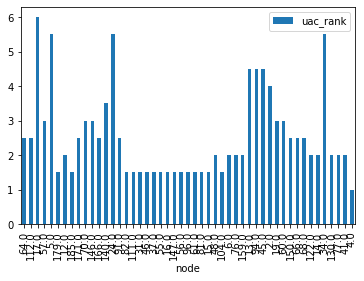

In [57]:
#f, ax = plt.subplots(figsize=(18,5)) plt.bar([1,2,3,4], [0.1,0.2,0.3,0.4], label = 'first bar')
fig=r3.plot(x="node", y="uac_rank", kind="bar")
#fig.figure(figsize=(20,20))


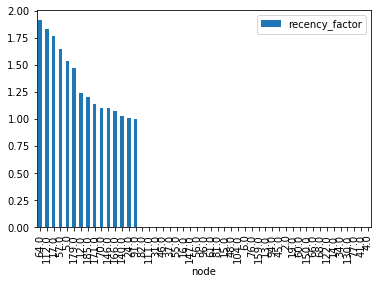

In [58]:
r3.plot(x="node", y="recency_factor", kind="bar")